<p>The Li-ion battery discharge time becomes shorter with each cycle. Due to the
discrete monitoring time, the TIEDVD HI in the τth cycle can be defined as:</p>
<p>Due to the discrete monitoring time, the TIEDVD HI in the τth cycle can be defined as:</p>
<b>HI(τ)=max(T(t)) - min(T(τ)</b>, where τ=1,2,....,k

In [5]:
import pandas as pd

In [ ]:
# This code used to find the time interval of equal discharge voltage difference (TIEDVD) for Battrey 05.
# It takes two files and return CSV file that contains the TIEDVD for every cycle.

di={}
d1={}
d2={}
#B0005_10_discharge.csv show all the details of each cycle.
discharge = pd.read_csv('B0005_10_discharge.csv')
# B0005_discharge.csv shows that total time at the end of each cycle,also it include the capacity.
discharge2 = pd.read_csv('B0005_discharge.csv')


cycle=discharge['cycle'][0] 
maxm=0.0
minm=0.0 
H=0.0
ch1=True
ch2=True
MAX_Value=3.80
MIN_Value=3.41
os=0.0
for i in range(len(discharge)):
    if discharge['cycle'][i] != cycle:
        #print("the Dis val is "+ str(os) +" and the cycle"+ str(cycle))
        d1[cycle]=maxm
        d2[cycle]=minm
        H=minm-maxm
        di[cycle]=H
        minm=0
        maxm=0
        ch1,ch2=True, True
        cycle=discharge['cycle'][i]
       # discharge2['H']=(H)
    else:
        if discharge['voltage_battery'][i]>MAX_Value and ch1:
            maxm=discharge['time'][i]
        else:
            ch1=False
        if discharge['voltage_battery'][i]>=MIN_Value and ch2:
            minm=discharge['time'][i]
            os=discharge['voltage_battery'][i]
        else:
            ch2=False
di[cycle]=minm-maxm
ls=[]
ls=list(di.values())
# Add TIEDVD as col to the file.
discharge2['TIEDVD']=ls

discharge2.to_csv("Discharge5_H1.csv")

In [42]:
#These two files for battery 05 and 06 contains TIEDVD values.
dis_H=pd.read_csv('Discharge5_H1.csv')
dis_H1=pd.read_csv('Discharge6_H1.csv')

Text(0.5, 1.0, 'Discharge B0005 - Cycle with Time interval')

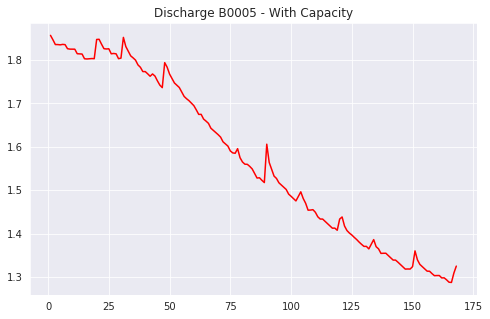

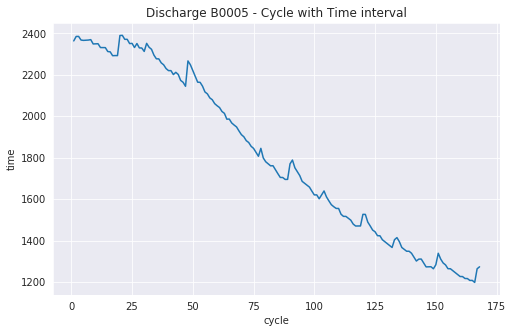

In [58]:
#show the similarty between TIEDVD and Capacity for Battery B0005 by graph.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
plot_df = dis_H.loc[(dis_H1['cycle']>=1),['cycle','H']]
plot_df1 = dis_H.loc[(dis_H1['cycle']>=1),['cycle','Capacity']]
plt.plot(plot_df1['cycle'], plot_df1['Capacity'], color='red')
plt.title('Discharge B0005 - With Capacity')

sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['H'])
#plt.plot(plot_df1['cycle'], plot_df1['Capacity'], color='red')

#Draw threshold
#plt.plot(dis['cycle'], dis['limt']) 'g'
plt.ylabel('time')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('cycle')
plt.title('Discharge B0005 - Cycle with Time interval')


Text(0.5, 1.0, 'Discharge B0006 - Cycle with Time interval')

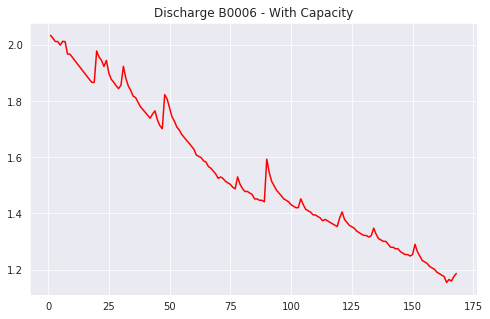

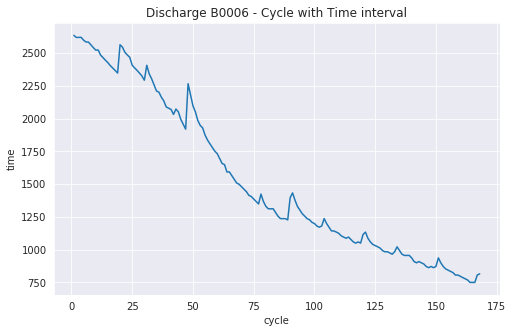

In [44]:
#show the similarty between TIEDVD and Capacity for Battery B0005 by graph.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
plot_df = dis_H1.loc[(dis_H1['cycle']>=1),['cycle','H']]
plot_df1 = dis_H1.loc[(dis_H1['cycle']>=1),['cycle','Capacity']]
plt.plot(plot_df1['cycle'], plot_df1['Capacity'], color='red')
plt.title('Discharge B0006 - With Capacity')

sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['H'])
#plt.plot(plot_df1['cycle'], plot_df1['Capacity'], color='red')

#Draw threshold
#plt.plot(dis['cycle'], dis['limt']) 'g'
plt.ylabel('time')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('cycle')
plt.title('Discharge B0006 - Cycle with Time interval')


In [45]:
Cap_fit=dis_H['Capacity'].values
H_fit=dis_H['H'].values

In [46]:
l1,l2=[],[]
#Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y).
#Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
z=np.polyfit(H_fit,Cap_fit,1)

In [47]:
print(z)

[4.72897821e-04 7.18498039e-01]


In [48]:
# By using linear function y=m*x + b, where m and b take from z=np.polyfit(H_fit,Cap_fit,1)
# b= 0.718498039 and m=0.0004789782.
for i in range(len(H_fit)):
    xx=(0.0004789782 * H_fit[i])+0.718498039
    l1.append(xx)

In [49]:
#The code above used to fit the TIEDVD value, to find the similarty between TIEDVD and Capacity.
dis_H['fit']=l1


<h3> the mapping relationship between indirect HI and Li-ion battery capacity is obtained by the polynomial fitting (B0005)</h3>

Text(0.5, 1.0, 'Discharge')

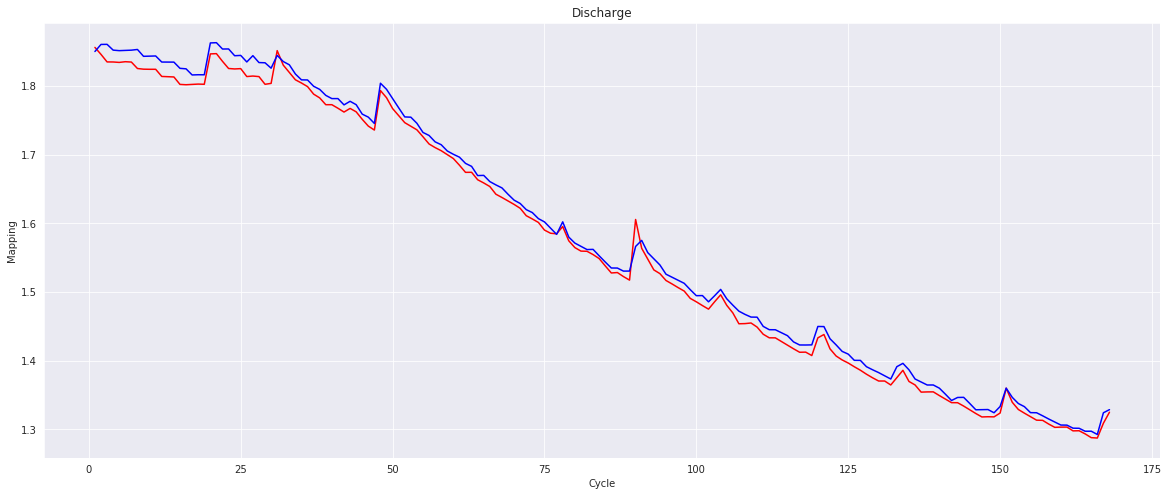

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = dis_H.loc[(dis_H['cycle']>=1),['cycle','Capacity']]
plot_df1 = dis_H.loc[(dis_H['cycle']>=1),['cycle','fit']]


sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['cycle'], plot_df['Capacity'],color='red')
plt.plot(plot_df1['cycle'], plot_df1['fit'],'-',color='blue')

plt.ylabel('Mapping')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Cycle')
plt.title('Discharge')


In [51]:
Cap_fit=dis_H1['Capacity'].values
H_fit=dis_H1['H'].values

In [52]:
import numpy as np # linear algebra
l1,l2=[],[]
z=np.polyfit(H_fit,Cap_fit,1)

In [53]:
print(z)

[4.16760705e-04 9.08303981e-01]


In [54]:
for i in range(len(H_fit)):
    xx=(0.000416760705 * H_fit[i])+0.908303981
    l2.append(xx)
    

In [56]:
dis_H1['fit']=l2


<h3> the mapping relationship between indirect HI and Li-ion battery capacity is obtained by the polynomial fitting (B0006)</h3>

Text(0.5, 1.0, 'Discharge')

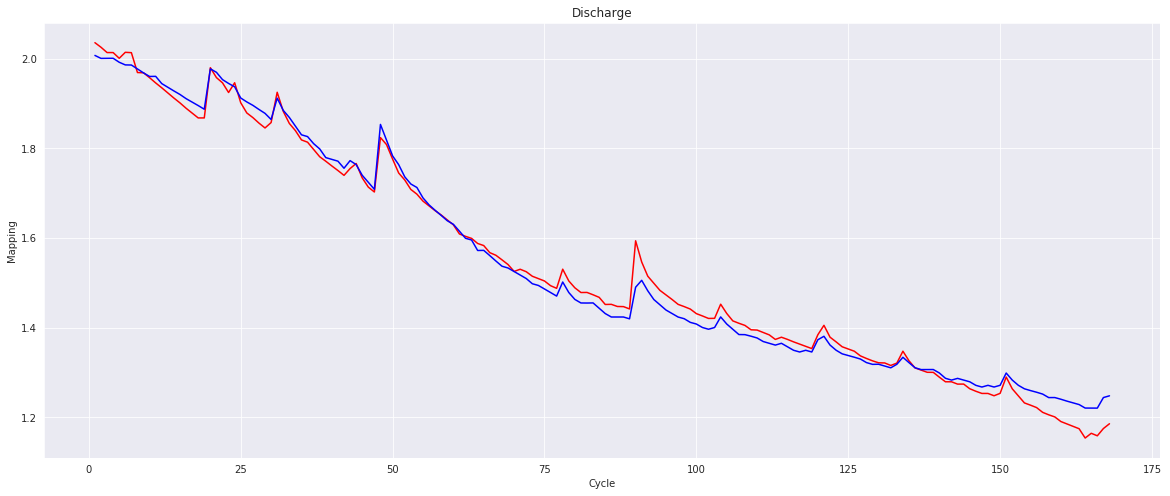

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = dis_H1.loc[(dis_H1['cycle']>=1),['cycle','Capacity']]
plot_df1 = dis_H1.loc[(dis_H1['cycle']>=1),['cycle','fit']]


sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['cycle'], plot_df['Capacity'],color='red')
plt.plot(plot_df1['cycle'], plot_df1['fit'],'-',color='blue')

plt.ylabel('Mapping')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Cycle')
plt.title('Discharge')


<h3><a href="https://github.com/Kalrfou/CapstoneProject/blob/master/LSTM_paper_2.ipynb">
Run LSTM</a></h3>